<a href="https://colab.research.google.com/github/ImtiazAhammad/Fake-news-classifier/blob/main/Fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: FA-KES-Dataset.csv      


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/FA-KES-Dataset.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [ ]:
df.shape

(804, 7)

In [ ]:
df.describe()

,unit_id,labels
count,8.040000e+02,804.000000
mean,1.936024e+09,0.529851
std,1.876968e+07,0.499419
min,1.914948e+09,0.000000
25%,1.923848e+09,0.000000
50%,1.924058e+09,1.000000
75%,1.962496e+09,1.000000
max,1.965511e+09,1.000000


In [ ]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

In [ ]:
messages = df.copy()

In [ ]:
messages.reset_index(inplace = True)

In [ ]:
messages

,index,unit_id,article_title,article_content,source,date,location,labels
0,0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...,...
799,799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [ ]:
messages['article_content'][2]

'Sun 16 Apr 2017 Death toll from Aleppo bomb attack at least 112. The death toll from a bomb blast on a crowded Syrian bus convoy outside Aleppo reached at least 112 people the Syrian Observatory for Human Rights monitoring group said on Sunday. Syrian rescue workers the Civil Defence said that they had carted away at least 100 bodies from the site of Saturdays blast which hit buses carrying Shiite residents as they waited to cross from rebel into government territory in an evacuation deal between warring sides. The British-based Observatory said the number was expected to rise. Those killed were mostly residents of the villages of al-Foua and Kefraya in Idlib province but included rebel fighters guarding the convoy the Observatory said. There was no immediate claim of responsibility for the attack which pro-Damascus media said was carried out by a suicide car bomber. The convoy was carrying at least 5000 people including civilians and several hundred pro-government fighters who were g

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-z]', ' ', messages['article_content'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [ ]:
X.shape

(804, 5000)

In [ ]:
y = messages['labels']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=10)

In [ ]:
cv.get_feature_names_out()[:20]

array(['abdel', 'abdel rahman', 'abdel rahman head', 'abdel rahman said',
       'abdel rahman told', 'abduct', 'abdul', 'abdullah', 'abdulrahman',
       'abdurrahman', 'abil', 'abl', 'abort', 'abort polici',
       'abort polici th', 'abu', 'abu al', 'abu kamal', 'abyad',
       'academi'], dtype=object)

In [ ]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names_out())

In [ ]:
count_df.head()

,abdel,abdel rahman,abdel rahman head,abdel rahman said,abdel rahman told,abduct,abdul,abdullah,abdulrahman,abdurrahman,...,zabadani,zahra,zahraa,zahraa neighborhood,zeinab,zone,zor,zor provinc,zour,zour provinc
0,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import metrics
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):


  plt.imshow(cm, interpolation= 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)


  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalize confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
              horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()

accuracy score is : 0.45867768595041325
Confusion Matrix without Normalization


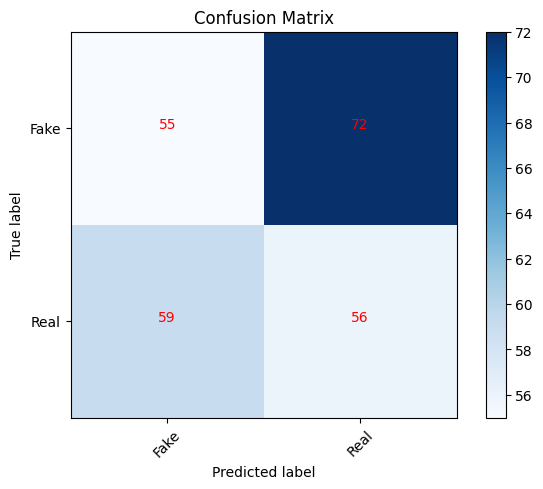

In [ ]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy score is :", score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake', 'Real'])

In [ ]:
#use passive aggrasive classifier

from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy score is : 0.5041322314049587
Confusion Matrix without Normalization


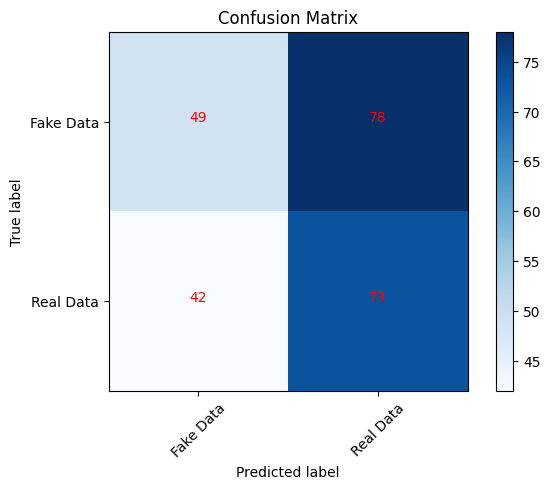

In [ ]:
linear_clf.fit(x_train,y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy score is :", score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes= [ 'Fake Data', 'Real Data'])


In [ ]:
#multinomial Classifier with Hyperparameter

from sklearn.naive_bayes import MultinomialNB


In [ ]:
classifer = MultinomialNB(alpha=0.1)

In [ ]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train,y_train)
  y_pred = sub_classifier.predict(x_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score>previous_score:
    classifier = sub_classifier
  print("Alpha: {}, Score: {}".format(alpha,score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.47107438016528924
Alpha: 0.1, Score: 0.4628099173553719
Alpha: 0.2, Score: 0.45867768595041325
Alpha: 0.30000000000000004, Score: 0.45454545454545453
Alpha: 0.4, Score: 0.45041322314049587
Alpha: 0.5, Score: 0.45454545454545453
Alpha: 0.6000000000000001, Score: 0.45454545454545453
Alpha: 0.7000000000000001, Score: 0.45454545454545453
Alpha: 0.8, Score: 0.45454545454545453
Alpha: 0.9, Score: 0.45454545454545453
